In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from rdkit import DataStructs
import numpy as np
import os

In [3]:
# def plot_molecular_weights(metabolite_weights, parent_weights, weights_diff):
#     # Plot histograms for metabolite and parent weights side by side
#     fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#     axes[1].hist(metabolite_weights, bins=50, color='lightgreen')
#     axes[1].set_title('Child Weights')
#     axes[1].set_xlabel('Molecular Weight (Da)')
#     axes[1].set_ylabel('Frequency')
#     axes[1].set_xlim(0, 1500)  # Set x-axis limits
#     axes[1].set_ylim(0, 1200)

#     axes[0].hist(parent_weights, bins=50, color='skyblue')
#     axes[0].set_title('Parent Weights')
#     axes[0].set_xlabel('Molecular Weight (Da)')
#     axes[0].set_ylabel('Frequency')
#     axes[0].set_xlim(0, 1500)  # Set x-axis limits
#     axes[0].set_ylim(0, 1200)

#     # Make y-axes equal
#     histograms = [axes[0], axes[1]]
#     #max_ylim = max(ax.get_ylim()[1] for ax in histograms)  # Find the maximum y-limit
#     # for ax in histograms:
#     #     ax.set_ylim(top=max_ylim)

#     plt.tight_layout()
#     plt.show()

#     # Plot histogram for weight differences
#     plt.figure(figsize=(6, 5))
#     plt.hist(weights_diff, bins=40, color='magenta')
#     plt.title('Weight Differences (Parent - Child)')
#     plt.xlabel('Weight Difference (Da)')
#     plt.ylabel('Frequency')
#     plt.show()

def plot_molecular_weights(metabolite_weights, parent_weights, weights_diff):
    # Define the range and bin width
    x_range = (0, 800)
    bin_width = 10  # Define a desired bin width
    
    # Calculate the number of bins
    bins = np.arange(x_range[0], x_range[1] + bin_width, bin_width)

    # Plot histograms for metabolite and parent weights side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[1].hist(metabolite_weights, bins=bins, color='skyblue')
    axes[1].set_title('Child Weights')
    axes[1].set_xlabel('Molecular Weight (Da)')
    axes[1].set_ylabel('Frequency')
    axes[1].set_xlim(0, 800)
    axes[1].set_ylim(0, 6.5)

    axes[0].hist(parent_weights, bins=bins, color='lightgreen')
    axes[0].set_title('Parent Weights')
    axes[0].set_xlabel('Molecular Weight (Da)')
    axes[0].set_ylabel('Frequency')
    axes[0].set_xlim(0, 800)
    axes[0].set_ylim(0, 6.5)

    plt.tight_layout()
    plt.show()

    # Plot histogram for weight differences
    plt.figure(figsize=(6, 5))
    plt.hist(weights_diff, bins=40, color='plum')
    plt.title('Weight Differences (Parent - Metabolite)')
    plt.xlabel('Weight Difference (Da)')
    plt.ylabel('Frequency')
    plt.show()


def molecular_weight_analysis(dataset): # input dataset needs columns 'parent_smiles' and 'child_smiles'

    metabolite_weights, parent_weights, weights_diff = [], [], []

    parents = dataset["parent_smiles"]
    metabolites = dataset["child_smiles"]

    for parent, metabolite in zip(parents, metabolites):

        metabolite_weight = Descriptors.ExactMolWt(Chem.MolFromSmiles(metabolite))
        metabolite_weights.append(metabolite_weight)

        parent_weight = Descriptors.ExactMolWt(Chem.MolFromSmiles(parent))
        parent_weights.append(parent_weight)

        weight_diff = (parent_weight-metabolite_weight)
        weights_diff.append (weight_diff)

    # Call the plotting function
    plot_molecular_weights(metabolite_weights, parent_weights, weights_diff)

    return weights_diff

In [38]:
# Graphs for comparing weights before and after filtering

def molecular_weight_analysis_2(dataset): # input dataset needs columns 'parent_smiles' and 'child_smiles'

    metabolite_weights, parent_weights = [], []

    parents = dataset["parent_smiles"]
    metabolites = dataset["child_smiles"]

    for parent, metabolite in zip(parents, metabolites):

        metabolite_weight = Descriptors.ExactMolWt(Chem.MolFromSmiles(metabolite))
        metabolite_weights.append(metabolite_weight)

        parent_weight = Descriptors.ExactMolWt(Chem.MolFromSmiles(parent))
        parent_weights.append(parent_weight)

    return metabolite_weights, parent_weights

def plot_molecular_weights_comparison(metabolite_weights_before, parent_weights_before, metabolite_weights_after, parent_weights_after, save_figure = None):

    plt.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})
    plt.figure(figsize=(12, 6))

    # Define the range and bin width
    x_range = (0, 800)
    bin_width = 10  # Define a desired bin width
  
    # Calculate the number of bins
    bins = np.arange(x_range[0], x_range[1] + bin_width, bin_width)

    # Plot histograms for metabolite and parent weights side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

    axes[0].hist(parent_weights_before, bins=bins, color='skyblue', label='Before Filtering')
    axes[0].hist(parent_weights_after, bins=bins, color='darkblue', alpha=0.8, label='After Filtering')  # Slightly transparent
    axes[0].set_xlabel('Parent Molecular Weight (Da)')
    axes[0].set_ylabel('Frequency')
    axes[0].set_xlim(0, 800)
    # axes[0].legend()

    axes[1].hist(metabolite_weights_before, bins=bins, color='skyblue', label='Before Filtering')
    axes[1].hist(metabolite_weights_after, bins=bins, color='darkblue', alpha=0.8, label='After Filtering')  # Slightly transparent
    axes[1].set_xlabel('Metabolite Molecular Weight (Da)')
    axes[1].set_xlim(0, 800)
    axes[1].set_ylim(0, 220)
    axes[1].legend()

    if save_figure is not None:
        os.makedirs('figures', exist_ok=True)
        plt.savefig(f'figures/{save_figure}.eps', format='eps')

    plt.tight_layout()
    plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 1200x600 with 0 Axes>

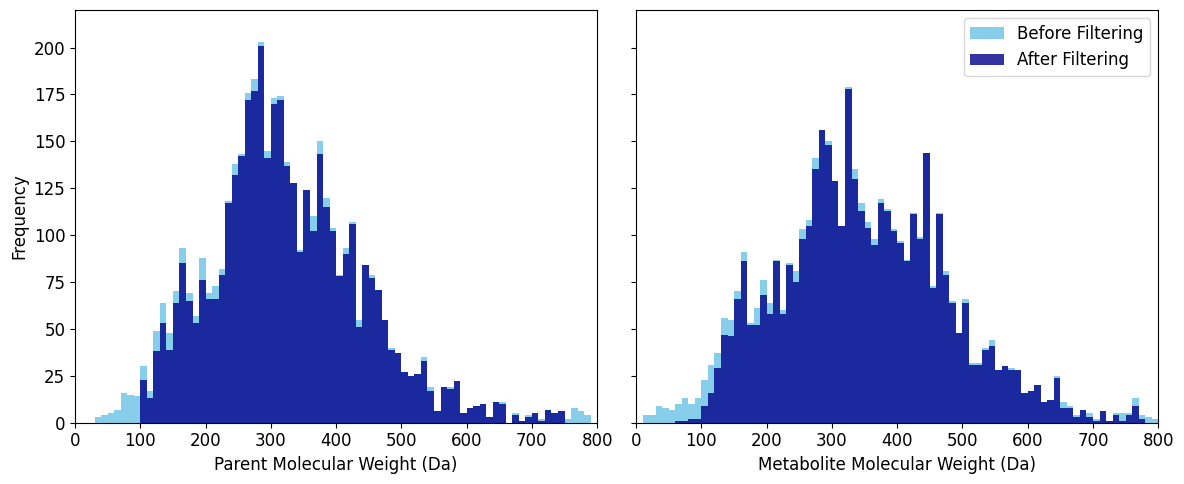

In [39]:
df_before = pd.read_csv('/projects/cc/se_users/carlsson_ksmq649/MasterThesis/dataset/curated_data/combined_smiles_before_filters.csv')
df_after = pd.read_csv('/projects/cc/se_users/carlsson_ksmq649/MasterThesis/dataset/curated_data/combined_smiles_clean.csv')

metabolite_weights_before, parent_weights_before = molecular_weight_analysis_2(df_before)
metabolite_weights_after, parent_weights_after = molecular_weight_analysis_2(df_after)
plot_molecular_weights_comparison(metabolite_weights_before, parent_weights_before, metabolite_weights_after, parent_weights_after, save_figure='weight_comparison')


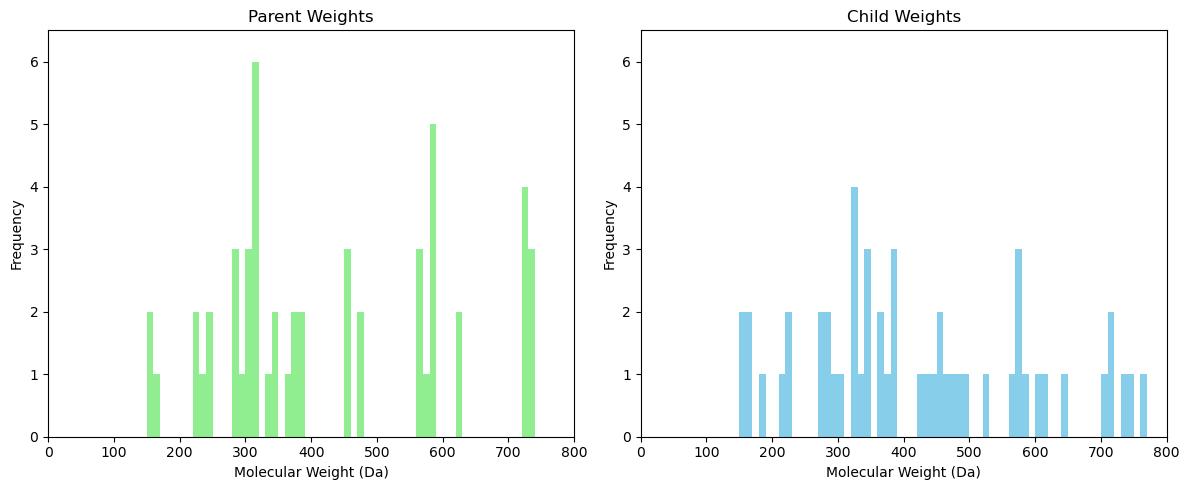

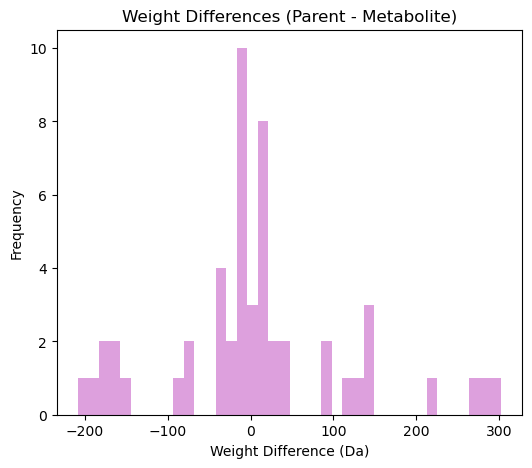

In [10]:
df = pd.read_csv('/projects/cc/se_users/carlsson_ksmq649/MasterThesis/dataset/curated_data/zero_predict_all_children.csv')
weights_diff = molecular_weight_analysis(df)

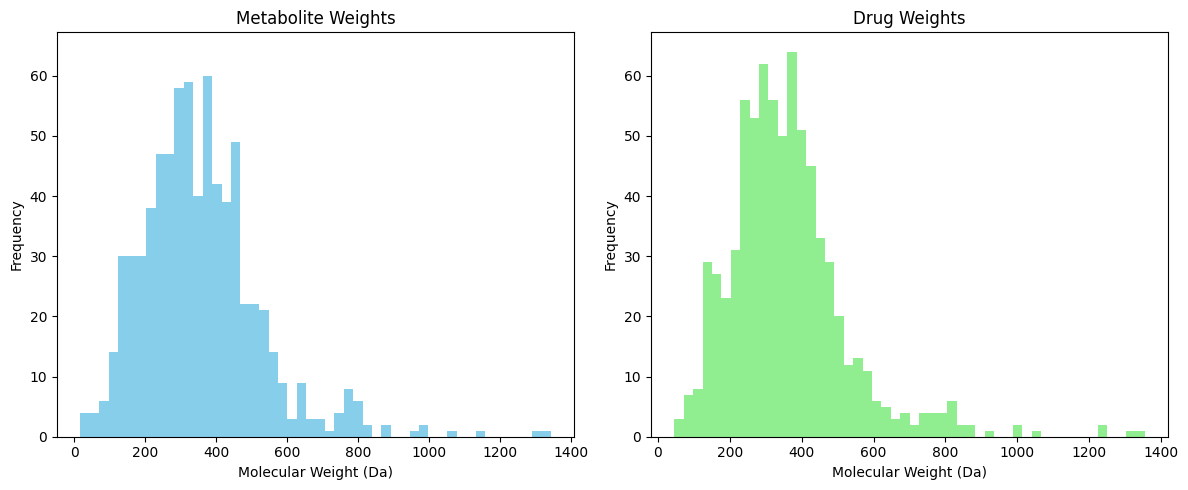

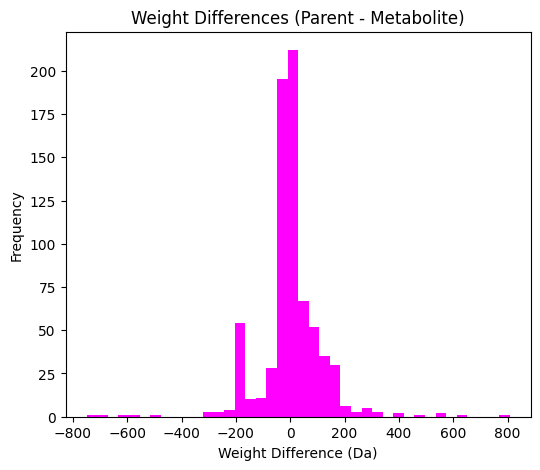

In [7]:
drugbank_clean_unique_parents_df = pd.read_csv('/projects/cc/se_users/carlsson_ksmq649/MasterThesis/dataset/curated_data/drugbank_clean_unique_parents.csv')
molecular_weight_analysis(drugbank_clean_unique_parents_df)

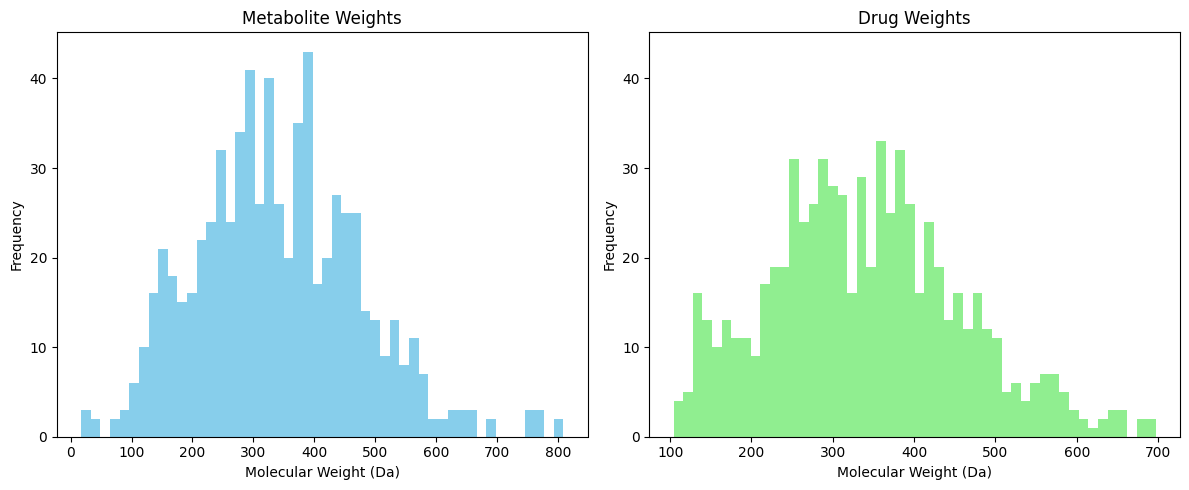

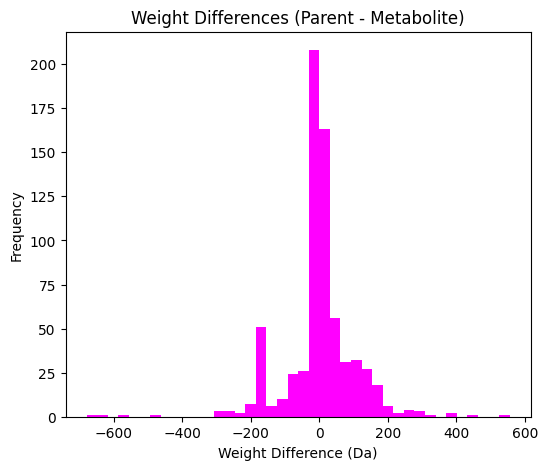

In [10]:
df = pd.read_csv('/projects/cc/se_users/carlsson_ksmq649/MasterThesis/dataset/curated_data/filtered_weights_parents_drugbank_clean_unique_parents.csv')
molecular_weight_analysis(df)

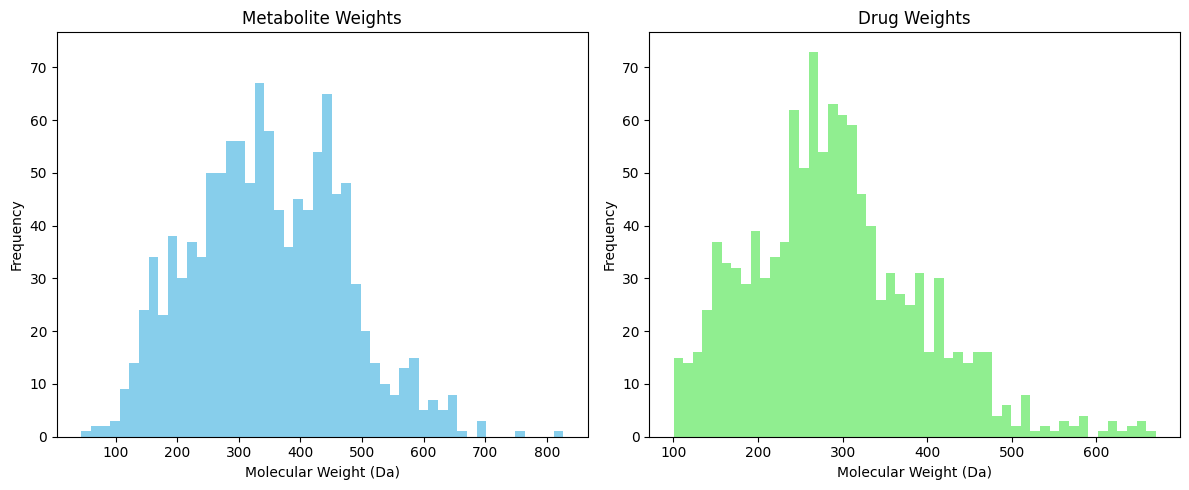

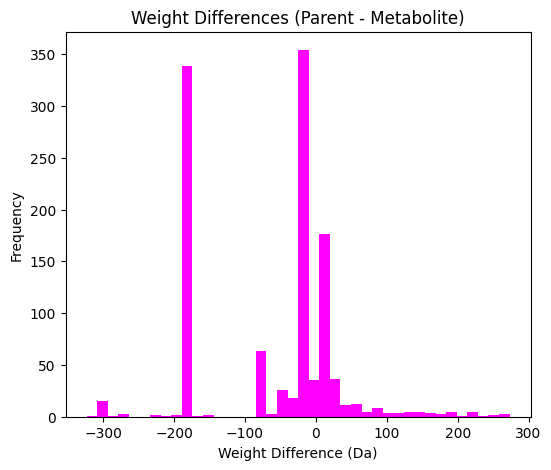

In [5]:
df = pd.read_csv('/projects/cc/se_users/carlsson_ksmq649/MasterThesis/dataset/curated_data/filtered_weights_parents_metxbiodb_clean_unique_parents.csv')
molecular_weight_analysis(df)

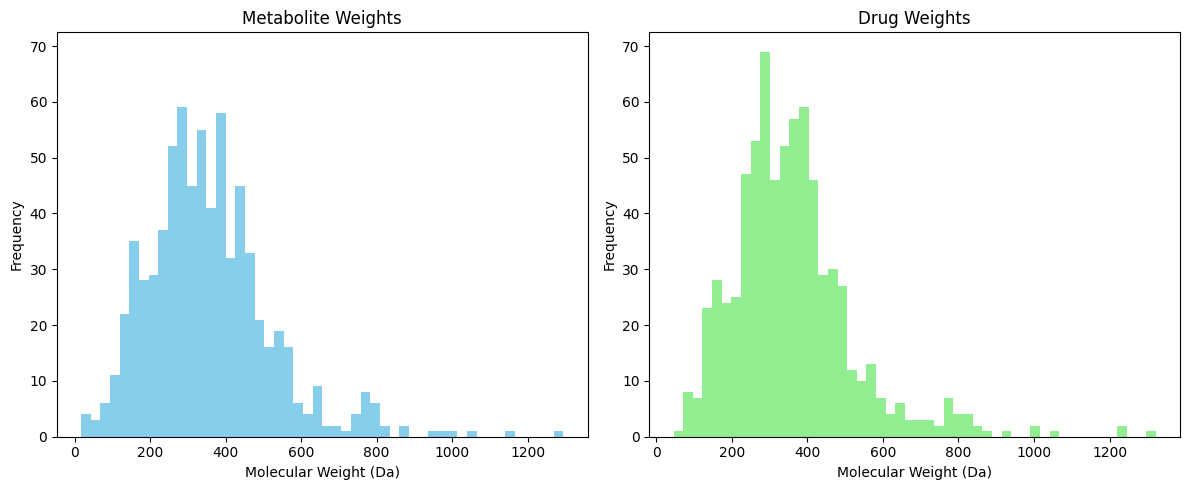

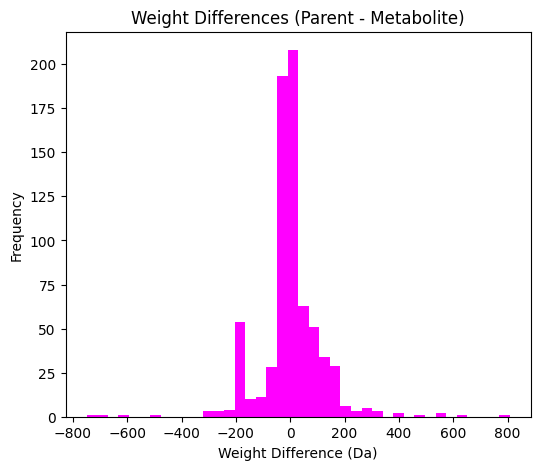

In [9]:
df = pd.read_csv('/projects/cc/se_users/carlsson_ksmq649/MasterThesis/dataset/curated_data/filtered/filtered_atoms_drugbank_clean_unique_parents.csv')
molecular_weight_analysis(df)

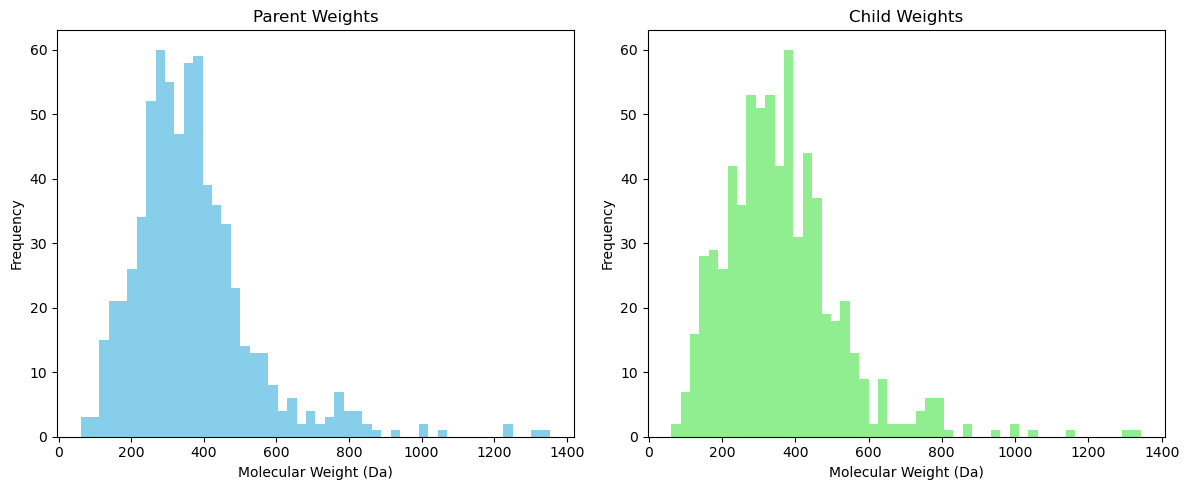

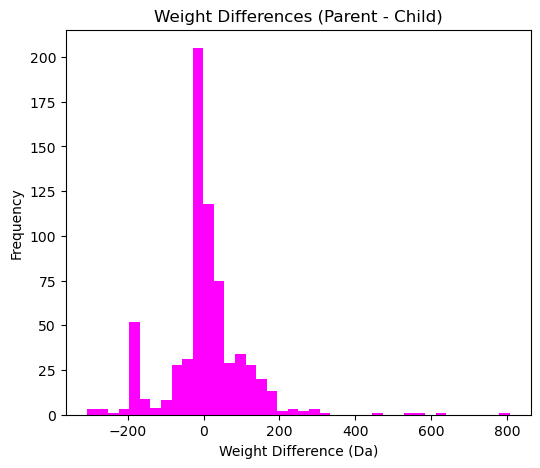

In [27]:
df = pd.read_csv('/projects/cc/se_users/carlsson_ksmq649/MasterThesis/dataset/curated_data/filtered/filtered_fingerprint_drugbank_clean_unique_parents.csv')
molecular_weight_analysis(df)

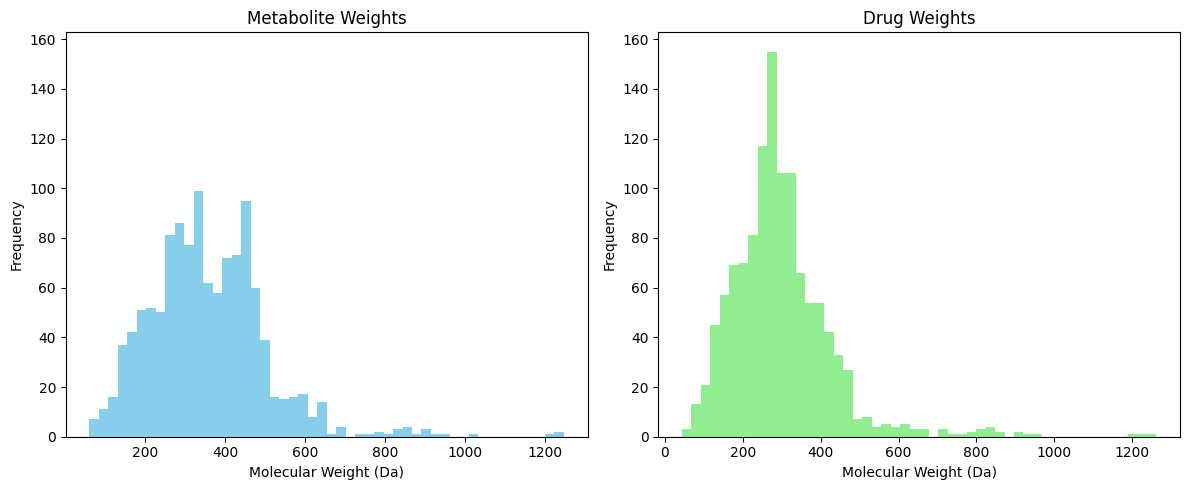

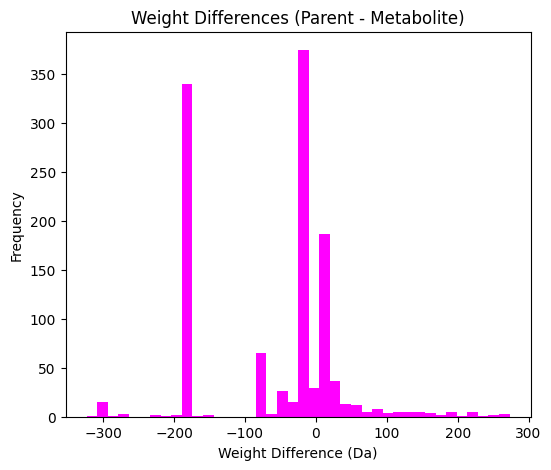

In [4]:
df = pd.read_csv('/projects/cc/se_users/carlsson_ksmq649/MasterThesis/dataset/curated_data/filtered/filtered_fingerprint_metxbiodb_clean_unique_parents.csv')
molecular_weight_analysis(df)

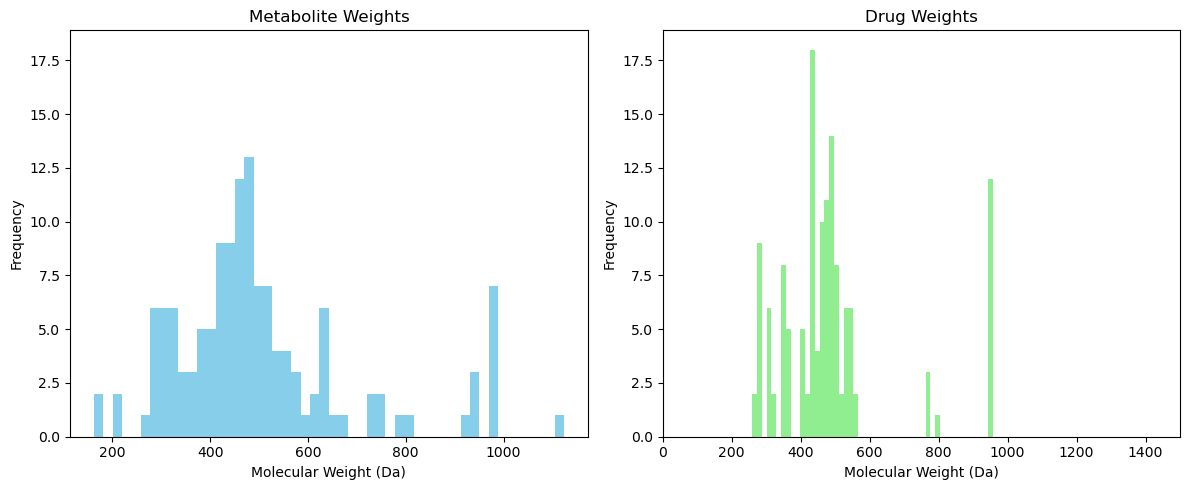

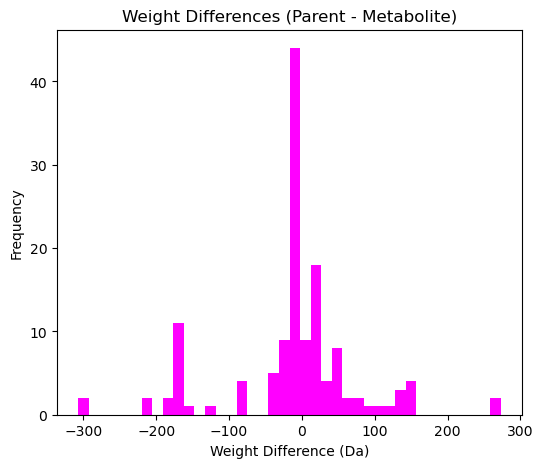

In [7]:
df = pd.read_csv('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/dataset/curated_data/gloryx_smiles_clean.csv')
molecular_weight_analysis(df)

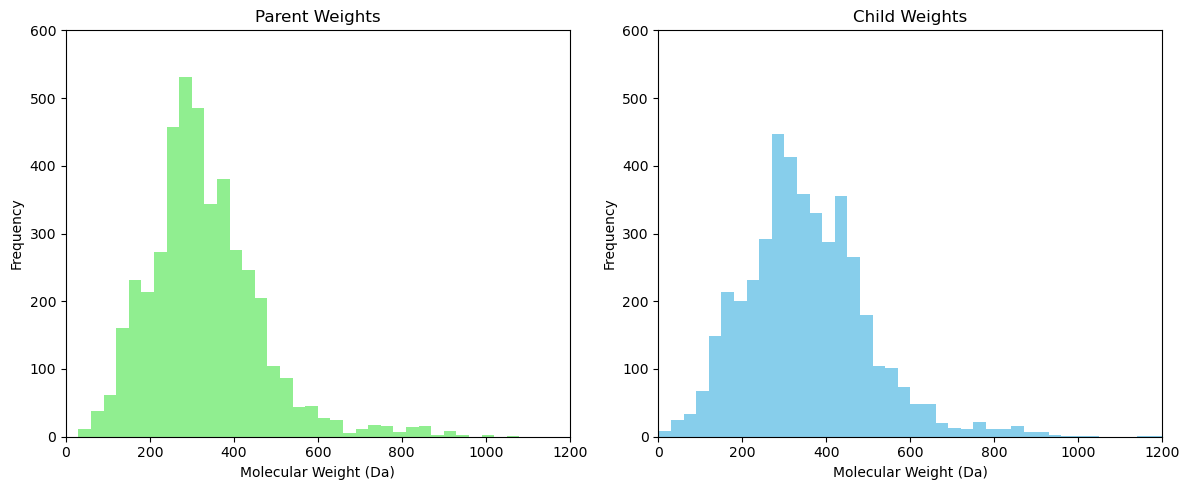

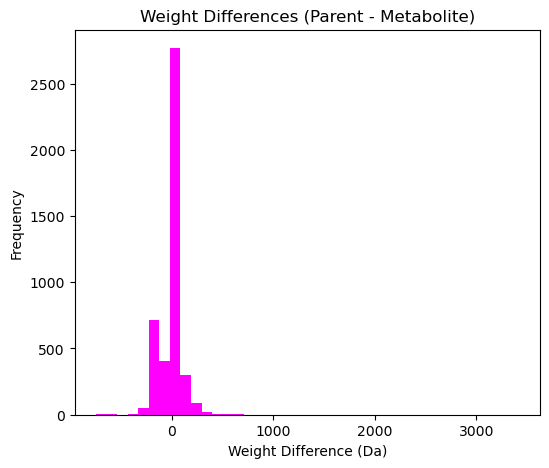

In [69]:
df = pd.read_csv('/projects/cc/se_users/carlsson_ksmq649/MasterThesis/dataset/curated_data/combined_smiles.csv')
molecular_weight_analysis(df)

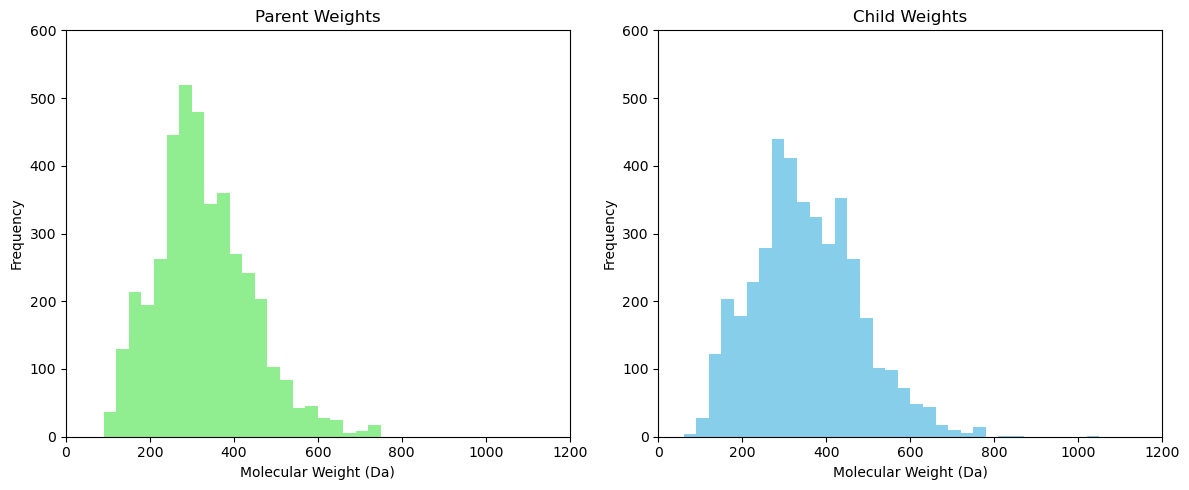

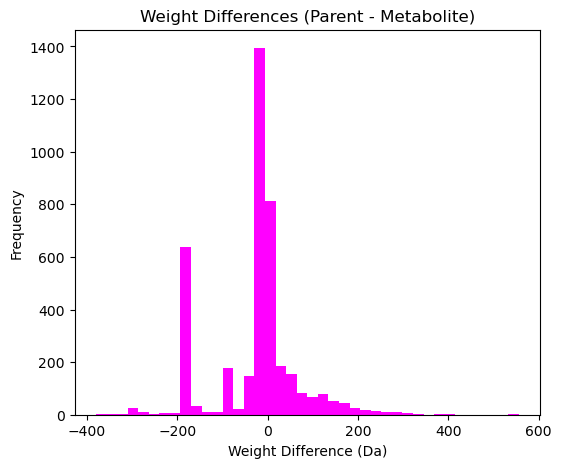

In [68]:
df = pd.read_csv('/projects/cc/se_users/carlsson_ksmq649/MasterThesis/dataset/curated_data/combined_smiles_clean.csv')
molecular_weight_analysis(df)

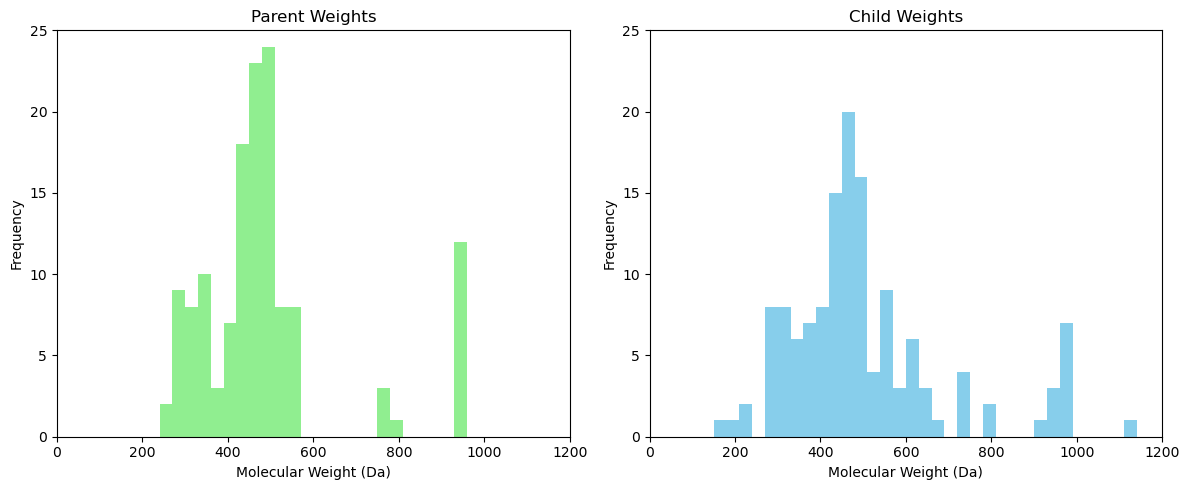

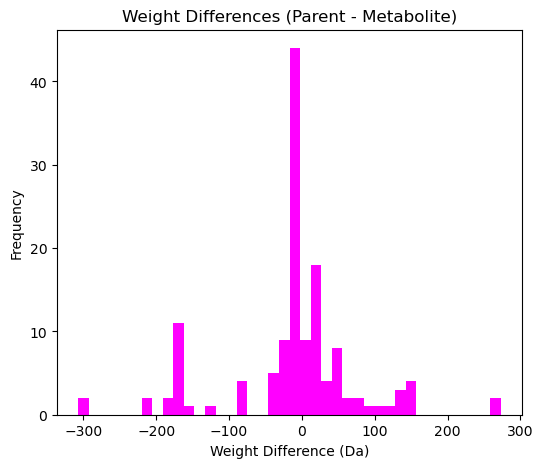

In [66]:
df = pd.read_csv('/projects/cc/se_users/carlsson_ksmq649/MasterThesis/dataset/curated_data/gloryx_smiles_clean.csv')
molecular_weight_analysis(df)